# Data Analysis Final Project
**Due Date:** January 29, 2026, 23:59  

**Group:** Cuircuit Synergy  

**Created By:** Jeremia Baumgartner, Lorenz Buchinger, Tim Zwölfer  

---
**Table of contents**
1. [A. Data Preprocessing and Data Quality (70 points)](#a-data-preprocessing-and-data-quality-70-points)
2. [B. Visualization and Exploratory Analysis (55 points)](#b-visualization-and-exploratory-analysis-55-points)
3. [C. Probability and Event Analysis (45 points)](#c-probability-and-event-analysis-45-points)
4. [D. Statistical Theory Applications (45 points)](#d-statistical-theory-applications-45-points)
5. [E. Regression and Predictive Modeling (45 points)](#e-regression-and-predictive-modeling-45-points)
6. [F. Dimensionality Reduction and Statistical Tests (40 points)](#f-dimensionality-reduction-and-statistical-tests-40-points)



---
**Initial Setup**

In [1]:
# Initial setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plotting
plt.rcParams.update({
    'figure.figsize': [6, 4],
    'figure.dpi': 150,
    'figure.autolayout': True,
    'axes.labelsize': 8,
    'axes.titlesize': 10,
    'font.size': 6,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6
})

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

np.random.seed(42)

---
**Load Data**

In [2]:
df_csv_data = pd.read_csv('traffic_accidents.csv')
df_csv_data_raw = df_csv_data # Keep a raw copy

---
## A. Data Preprocessing and Data Quality (70 points)
---
**Assigned to Lorenz**
- Dataset overview (dimensions, columns, types, time range, sampling rate, missingness
summary) (10 points)
- Basic statistical analysis using pandas (descriptives, grouped stats, quantiles) (10 points)
- Original data quality analysis with visualization (missingness patterns, outliers, dupli-
cates, timestamp gaps, inconsistent units) (20 points)
- Data preprocessing pipeline (cleaning steps, handling missing data, outliers strategy, re-
sampling or alignment if needed, feature engineering basics) (20 points)
- Preprocessed vs original comparison (before/after visuals plus commentary on what changed
and why) (10 points)

### Dataset Overview  
**Dimensions**

In [3]:
print("The dataset contains", df_csv_data.shape[0], "rows and", df_csv_data.shape[1], "columns.")

The dataset contains 209306 rows and 24 columns.


**Columns and types**

In [4]:
schema_table = (
    df_csv_data.dtypes
    .reset_index()
    .rename(columns={"index": "column", 0: "dtype"})
)

schema_table

,column,dtype
0,crash_date,object
1,traffic_control_device,object
2,weather_condition,object
3,lighting_condition,object
4,first_crash_type,object
5,trafficway_type,object
6,alignment,object
7,roadway_surface_cond,object
8,road_defect,object
9,crash_type,object


**Time Range**

In [5]:
first_date = df_csv_data["crash_date"].min()
last_date = df_csv_data["crash_date"].max()

print("First entry date:", first_date)
print("Last entry date:", last_date)

First entry date: 01/01/2016 01:03:00 AM
Last entry date: 12/31/2024 12:55:00 PM


**Sampling Rate**  
There is no constant sampling rate since car accidents don't happen in fixed intervals.

**Missingness Summary**  
Missing values in the dataset are encoded using the string 'UNKNOWN' rather than null values.

In [6]:
num_values_total = df_csv_data_raw.shape[0] * df_csv_data_raw.shape[1]
print("Total number of values in the dataset:", num_values_total)

unknown_total = (df_csv_data_raw == "UNKNOWN").sum().sum()
print("Total UNKNOWN values:", unknown_total)

unknown_percentage = (unknown_total / num_values_total) * 100
print(f"Percentage of UNKNOWN values: {unknown_percentage:.2f}%")

Total number of values in the dataset: 5023344
Total UNKNOWN values: 63320
Percentage of UNKNOWN values: 1.26%


In [7]:
missing_summary = pd.DataFrame({
    "missing_count": (df_csv_data_raw == "UNKNOWN").sum(),
    "missing_percent": ((df_csv_data_raw == "UNKNOWN").mean() * 100).round(2)
}).sort_values(by="missing_percent", ascending=False)

missing_summary

,missing_count,missing_percent
road_defect,34426,16.45
roadway_surface_cond,12509,5.98
weather_condition,6534,3.12
traffic_control_device,4455,2.13
lighting_condition,4336,2.07
trafficway_type,1060,0.51
first_crash_type,0,0.00
crash_date,0,0.00
alignment,0,0.00
crash_type,0,0.00


### Basic Statistical Analysis Using Pandas (descriptives, grouped stats, quantiles)

**Descriptive Analysis**  
Qantiles, min., max., mean value and standard deviation of all columns.

In [8]:
df_csv_data = df_csv_data.replace("UNKNOWN", np.nan)
df_csv_data.describe()

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
mean,2.063300,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822
std,0.396012,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000
max,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000


In [9]:
quantiles = df_csv_data.quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])
quantiles

TypeError: unsupported operand type(s) for -: 'str' and 'str'

**Grouped Stats**

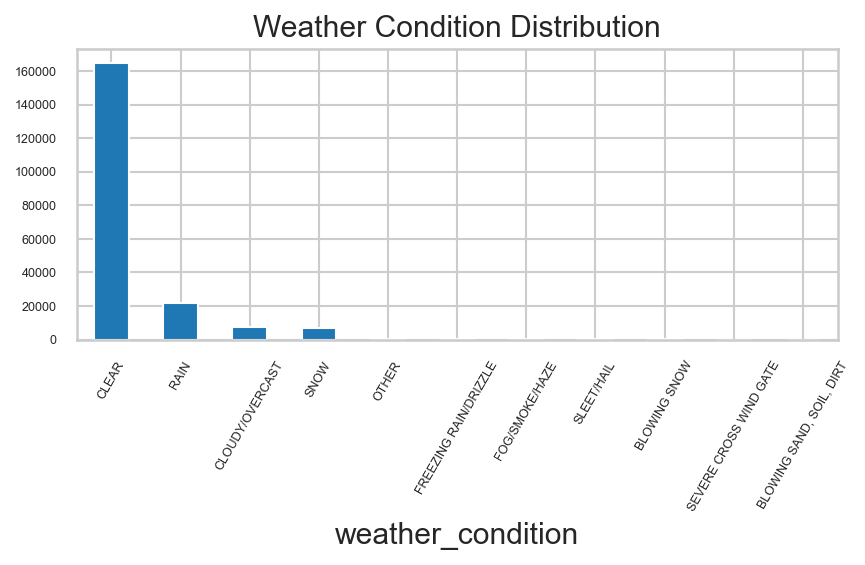

In [10]:
ax = df_csv_data["weather_condition"].value_counts().plot(kind="bar", title="Weather Condition Distribution")
ax.tick_params(axis='x', labelsize=6)
ax.tick_params(axis='y', labelsize=6)
ax.tick_params(axis="x", rotation=60)

In [11]:
# Analysis of correlation between injuries and weather condition
df_csv_data.groupby("weather_condition")["injuries_total"].agg(
    ["count", "mean", "median", "std"]
)

,count,mean,median,std
weather_condition,,,,
"BLOWING SAND, SOIL, DIRT",1,0.000000,0.0,NaN
BLOWING SNOW,127,0.314961,0.0,0.752781
CLEAR,164700,0.390401,0.0,0.812737
CLOUDY/OVERCAST,7533,0.369308,0.0,0.745190
FOG/SMOKE/HAZE,360,0.444444,0.0,0.829285
FREEZING RAIN/DRIZZLE,510,0.460784,0.0,0.864851
OTHER,627,0.483254,0.0,0.821607
RAIN,21703,0.411510,0.0,0.808552
SEVERE CROSS WIND GATE,32,0.250000,0.0,0.762001


In [12]:
# Analysis of correlation between injuries and time of day
df_csv_data.groupby("crash_hour")["injuries_total"].agg(
    ["count", "mean", "median", "std"]
)

,count,mean,median,std
crash_hour,,,,
0,4487,0.537330,0.0,0.969841
1,3729,0.534191,0.0,0.974719
2,3080,0.579221,0.0,1.078996
3,2364,0.537225,0.0,0.976171
4,2104,0.480989,0.0,0.875850
5,2819,0.431004,0.0,0.813593
6,4772,0.397737,0.0,0.799431
7,9405,0.360978,0.0,0.747282
8,11381,0.349354,0.0,0.729552


### Original data quality analysis with visualization
**Missingness Patterns**

In [13]:
missing_counts = df_csv_data.isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

road_defect               34426
roadway_surface_cond      12509
weather_condition          6534
traffic_control_device     4455
lighting_condition         4336
trafficway_type            1060
dtype: int64

In [14]:
# Ensure datetime
df = df_csv_data.copy()
df["crash_date"] = pd.to_datetime(df["crash_date"])

# Keep only relevant columns
df = df[["crash_date"] + cols]

# Create monthly period
df["month"] = df["crash_date"].dt.to_period("M")

# Calculate fraction missing per month per column
monthly_missing = (
    df.groupby("month")[cols]
      .apply(lambda x: x.isna().mean())
)

# Convert PeriodIndex to timestamp for plotting
monthly_missing.index = monthly_missing.index.to_timestamp()

# Plot heatmap
plt.figure(figsize=(16, 6))
ax = sns.heatmap(
    monthly_missing.T,
    cmap="rocket_r",
    cbar_kws={"label": "Fraction Missing"},
    linewidths=0.3
)

# Year-only x-axis ticks
months = monthly_missing.index
year_ticks = [i for i, d in enumerate(months) if d.month == 1]
year_labels = [d.year for d in months if d.month == 1]

ax.set_xticks(year_ticks)
ax.set_xticklabels(year_labels, rotation=0)

plt.title("Monthly Missing Data Fraction by Column")
plt.xlabel("Year")
plt.ylabel("Column")
plt.tight_layout()
plt.show()


C:\Users\Tim\AppData\Local\Temp\ipykernel_2136\2573400663.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["crash_date"] = pd.to_datetime(df["crash_date"])


NameError: name 'cols' is not defined

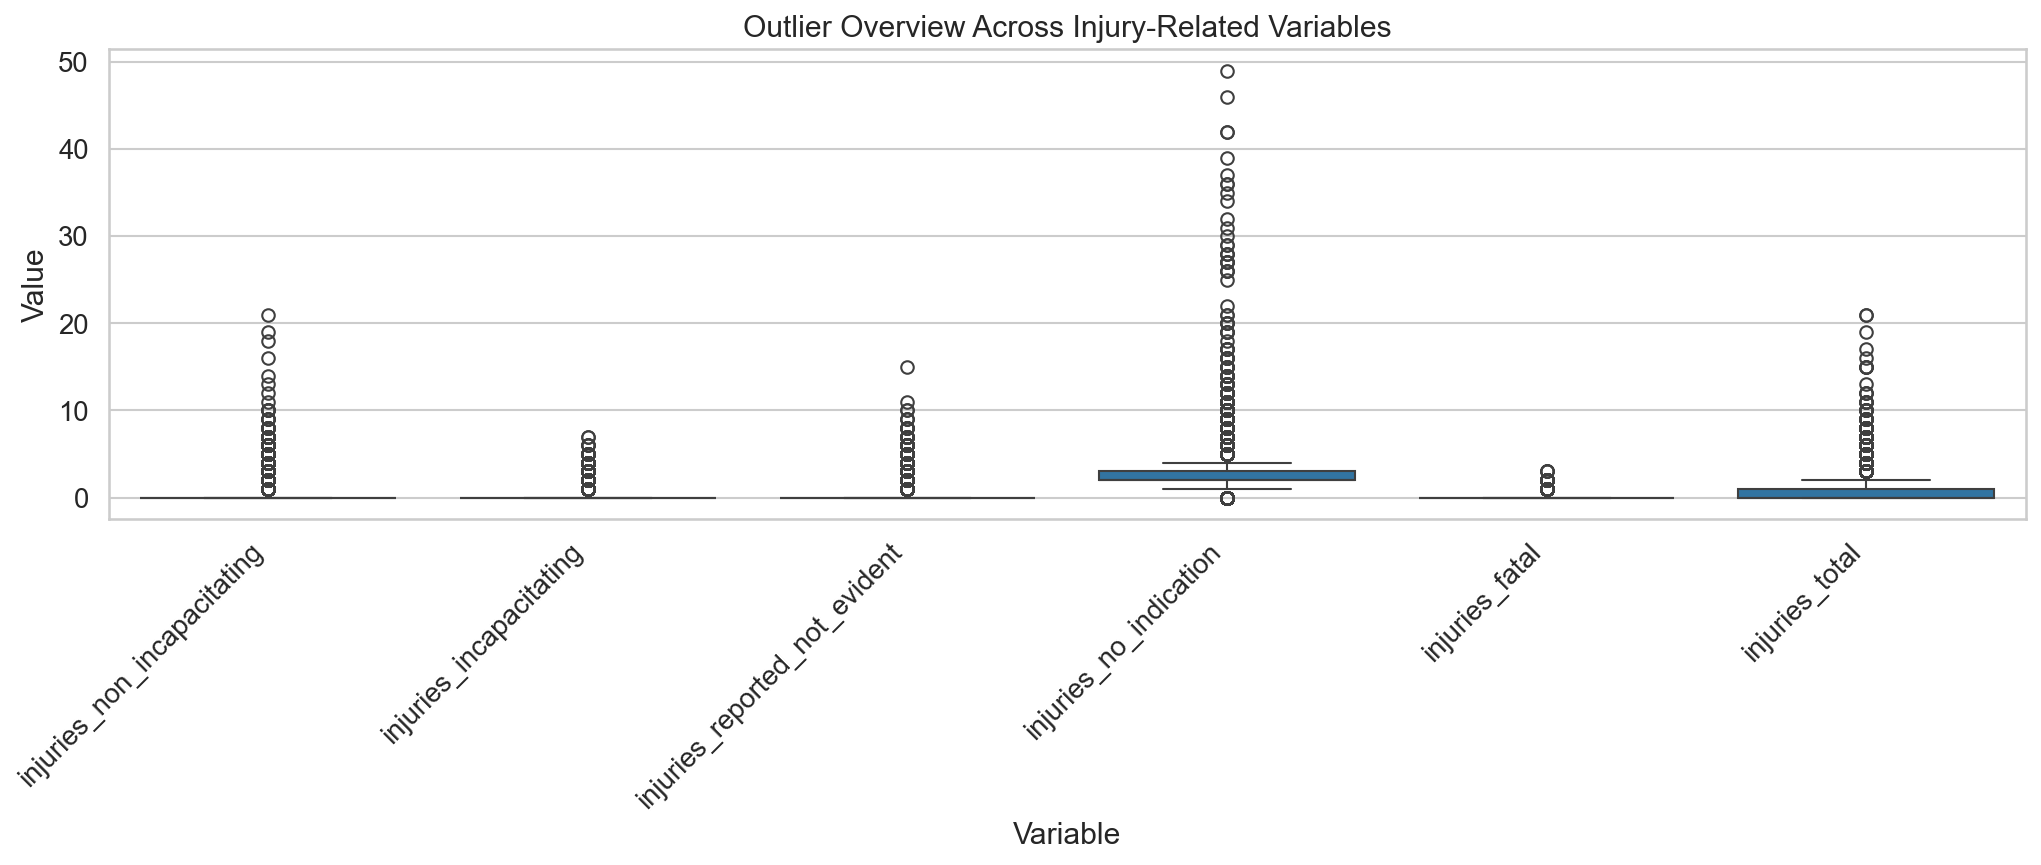

In [15]:
col_names = [
    "injuries_non_incapacitating",
    "injuries_incapacitating",
    "injuries_reported_not_evident",
    "injuries_no_indication",
    "injuries_fatal",
    "injuries_total"
]

selected_cols = df_csv_data[col_names]

df_melted = selected_cols.melt(
    var_name="Variable",
    value_name="Value"
)

plt.figure(figsize=(14,6))
sns.boxplot(
    data=df_melted,
    x="Variable",
    y="Value",
    showfliers=True
)
plt.xticks(rotation=45, ha="right")
plt.title("Outlier Overview Across Injury-Related Variables")
plt.tight_layout()
plt.show()

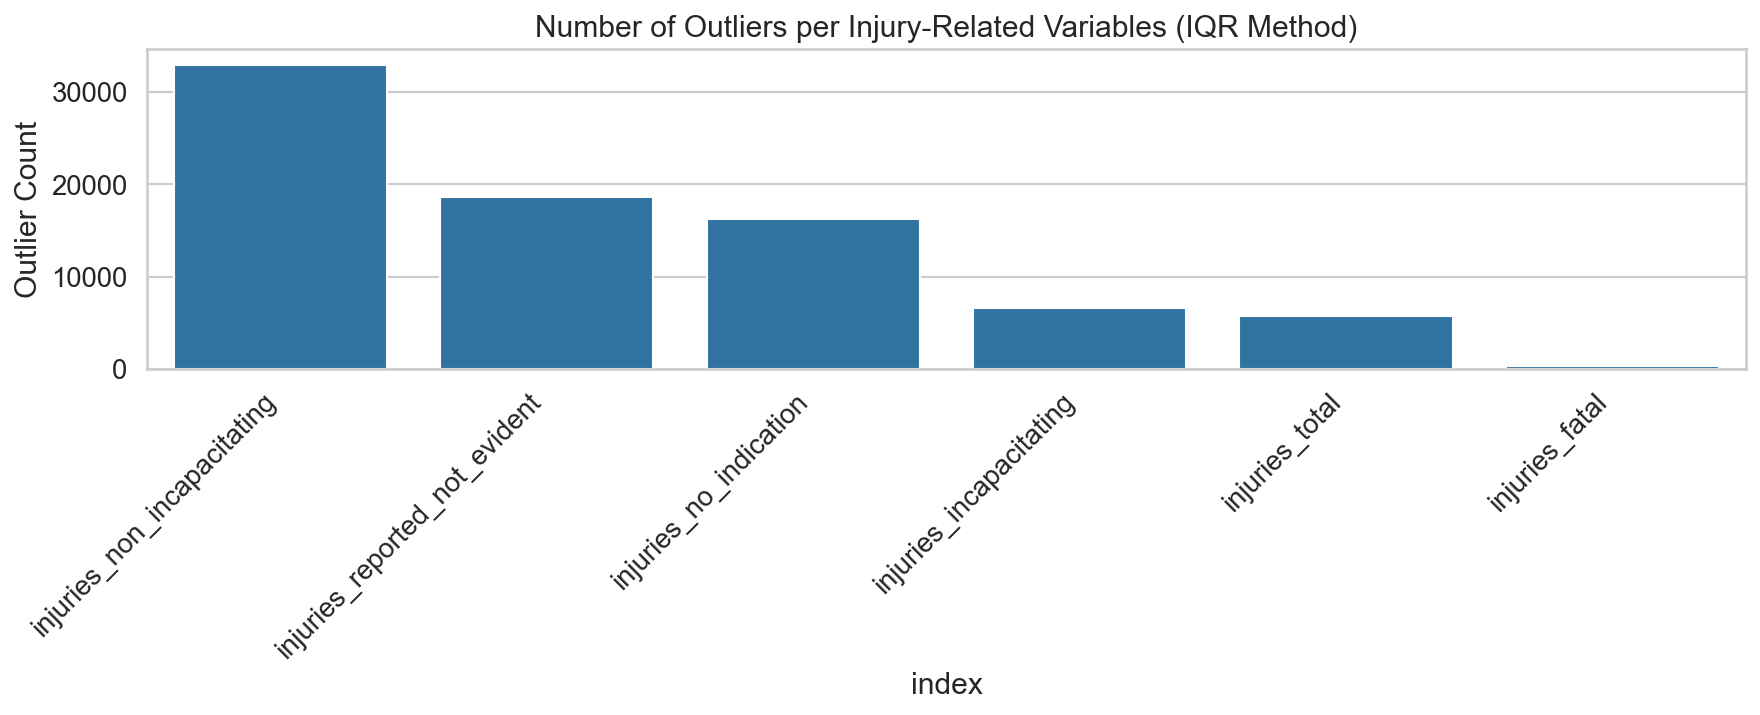

In [16]:
outlier_counts = {}

for col in col_names:
    Q1 = df_csv_data[col].quantile(0.25)
    Q3 = df_csv_data[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = (
        (df_csv_data[col] < Q1 - 1.5 * IQR) |
        (df_csv_data[col] > Q3 + 1.5 * IQR)
    )

    outlier_counts[col] = outliers.sum()

outlier_df = (
    pd.DataFrame.from_dict(
        outlier_counts,
        orient="index",
        columns=["Outlier Count"]
    )
    .sort_values("Outlier Count", ascending=False)
)

plt.figure(figsize=(12,5))
sns.barplot(
    data=outlier_df.reset_index(),
    x="index",
    y="Outlier Count"
)
plt.xticks(rotation=45, ha="right")
plt.title("Number of Outliers per Injury-Related Variables (IQR Method)")
plt.tight_layout()
plt.show()

In [17]:
# Check for typos, different capitalizations, or inconsistent entries in categorical columns

for col in df_csv_data.select_dtypes(include="object"):
    print(col)
    print(df_csv_data[col].value_counts().head())
    print("-"*40)

# No typos or inconsistencies found in categorical columns

crash_date
crash_date
12/29/2020 05:00:00 PM    10
02/17/2022 03:30:00 PM     8
11/26/2018 08:30:00 AM     6
06/05/2021 01:00:00 PM     6
09/11/2019 04:30:00 PM     6
Name: count, dtype: int64
----------------------------------------
traffic_control_device
traffic_control_device
TRAFFIC SIGNAL       123944
STOP SIGN/FLASHER     49139
NO CONTROLS           29508
OTHER                   670
YIELD                   468
Name: count, dtype: int64
----------------------------------------
weather_condition
weather_condition
CLEAR              164700
RAIN                21703
CLOUDY/OVERCAST      7533
SNOW                 6871
OTHER                 627
Name: count, dtype: int64
----------------------------------------
lighting_condition
lighting_condition
DAYLIGHT                  134109
DARKNESS, LIGHTED ROAD     53378
DARKNESS                    7436
DUSK                        6323
DAWN                        3724
Name: count, dtype: int64
----------------------------------------
first_cras

**Analysis of Timestamp Gaps**

In [18]:
# Ensure datetime and sort
df = df_csv_data.copy()
df["crash_date"] = pd.to_datetime(df["crash_date"])
df = df.sort_values("crash_date")

# Calculate gaps between consecutive accidents
df["time_gap"] = df["crash_date"].diff()

# Drop the first row (NaT gap)
gaps = df.dropna(subset=["time_gap"])

# Filter gaps greater than 1 day
long_gaps = (
    gaps[gaps["time_gap"] > pd.Timedelta(days=1)]
    [["crash_date", "time_gap"]]
    .rename(columns={"crash_date": "gap_end"})
)

# Add gap start for clarity
long_gaps["gap_start"] = long_gaps["gap_end"] - long_gaps["time_gap"]

# Optional: sort largest gaps first
long_gaps = long_gaps.sort_values("time_gap", ascending=False)

long_gaps


C:\Users\Tim\AppData\Local\Temp\ipykernel_2136\1628767530.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["crash_date"] = pd.to_datetime(df["crash_date"])


,gap_end,time_gap,gap_start
121162,2015-02-13 08:00:00,621 days 11:31:00,2013-06-01 20:29:00
132318,2015-05-25 23:38:00,101 days 15:38:00,2015-02-13 08:00:00
23119,2013-06-01 20:29:00,90 days 03:41:00,2013-03-03 16:48:00
106211,2015-08-02 19:55:00,68 days 20:17:00,2015-05-25 23:38:00
46652,2015-08-14 09:30:00,2 days 19:15:00,2015-08-11 14:15:00
42585,2015-08-06 10:00:00,1 days 19:30:00,2015-08-04 14:30:00
1958,2015-08-10 09:15:00,1 days 12:00:00,2015-08-08 21:15:00
15595,2015-08-17 01:11:00,1 days 10:11:00,2015-08-15 15:00:00
96371,2015-08-11 14:15:00,1 days 05:00:00,2015-08-10 09:15:00


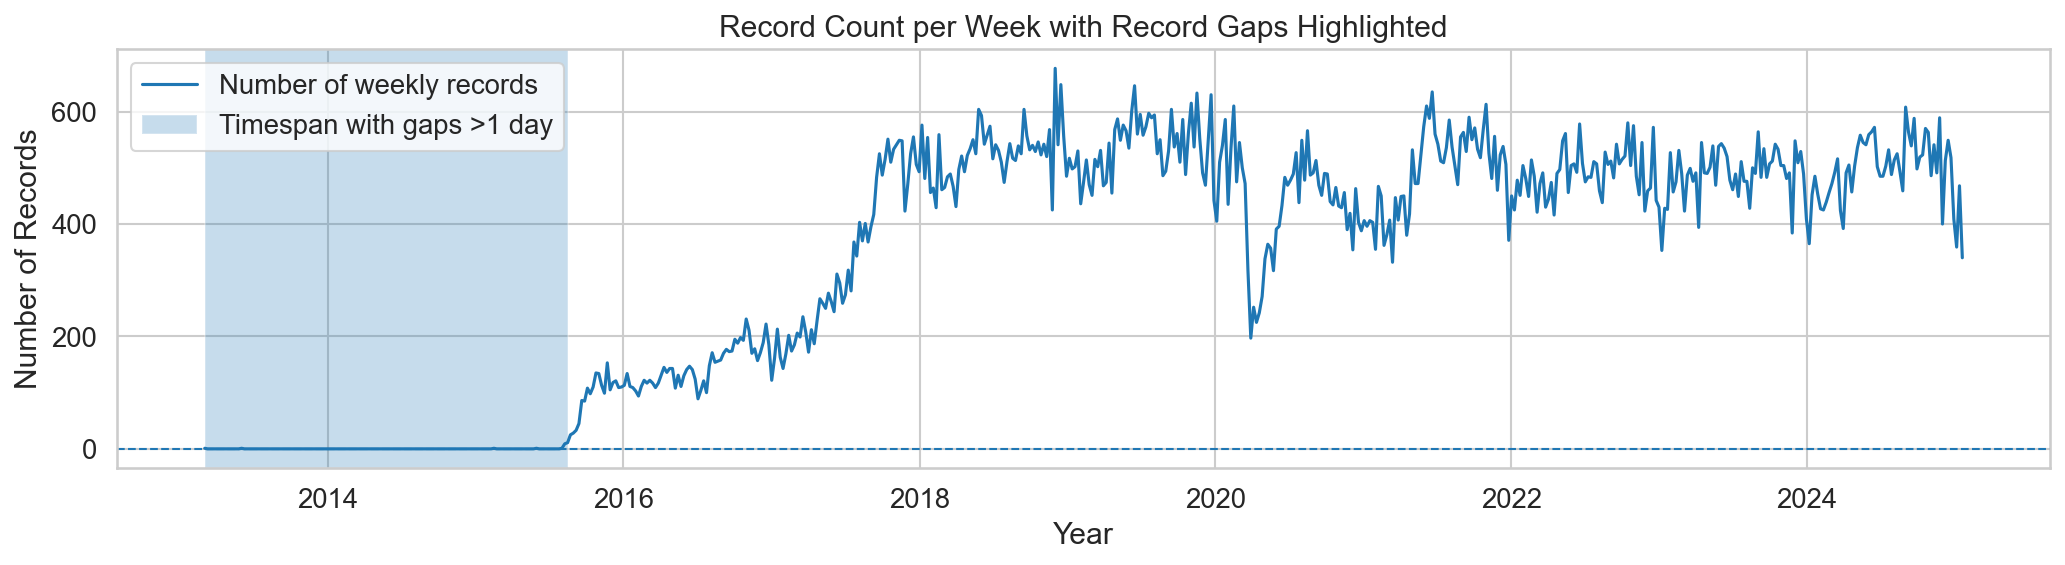

In [19]:
# Ensure datetime
df["crash_date"] = pd.to_datetime(df["crash_date"])

# Weekly record counts
weekly_counts = (
    df.set_index("crash_date")
      .resample("W")
      .size()
)

# Compute overall gap span
gap_span_start = long_gaps["gap_start"].min()
gap_span_end = long_gaps["gap_end"].max()

# Plot full timeline
plt.figure(figsize=(14, 4))
plt.plot(weekly_counts.index, weekly_counts.values, label="Number of weekly records")
plt.axhline(0, linestyle="--", linewidth=1)

# Highlight overall gap timespan
plt.axvspan(
    gap_span_start,
    gap_span_end,
    alpha=0.25,
    label="Timespan with gaps >1 day"
)

plt.title("Record Count per Week with Record Gaps Highlighted")
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\Tim\AppData\Local\Temp\ipykernel_2136\2252602108.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_plot["crash_date"] = pd.to_datetime(df_plot["crash_date"])


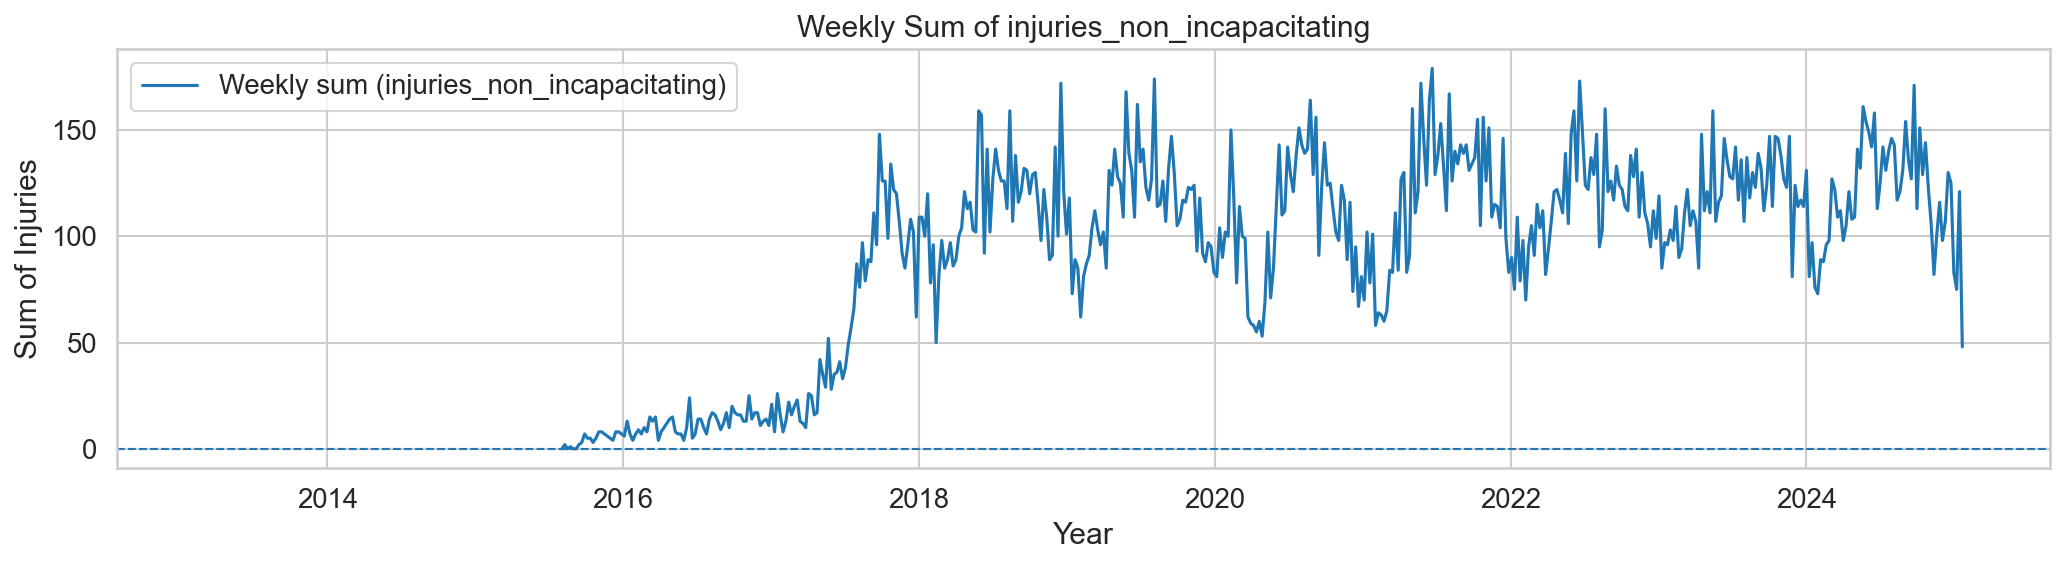

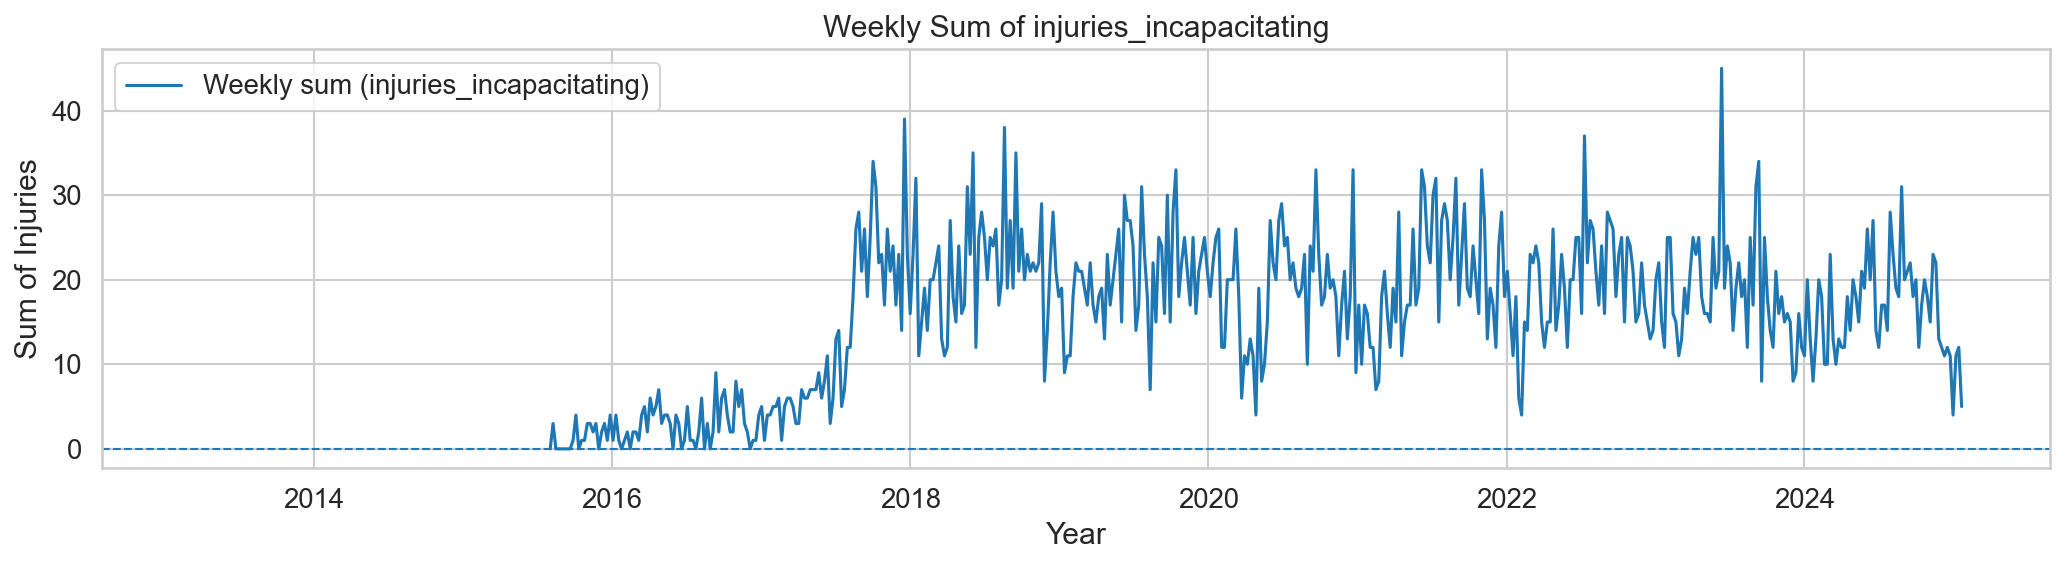

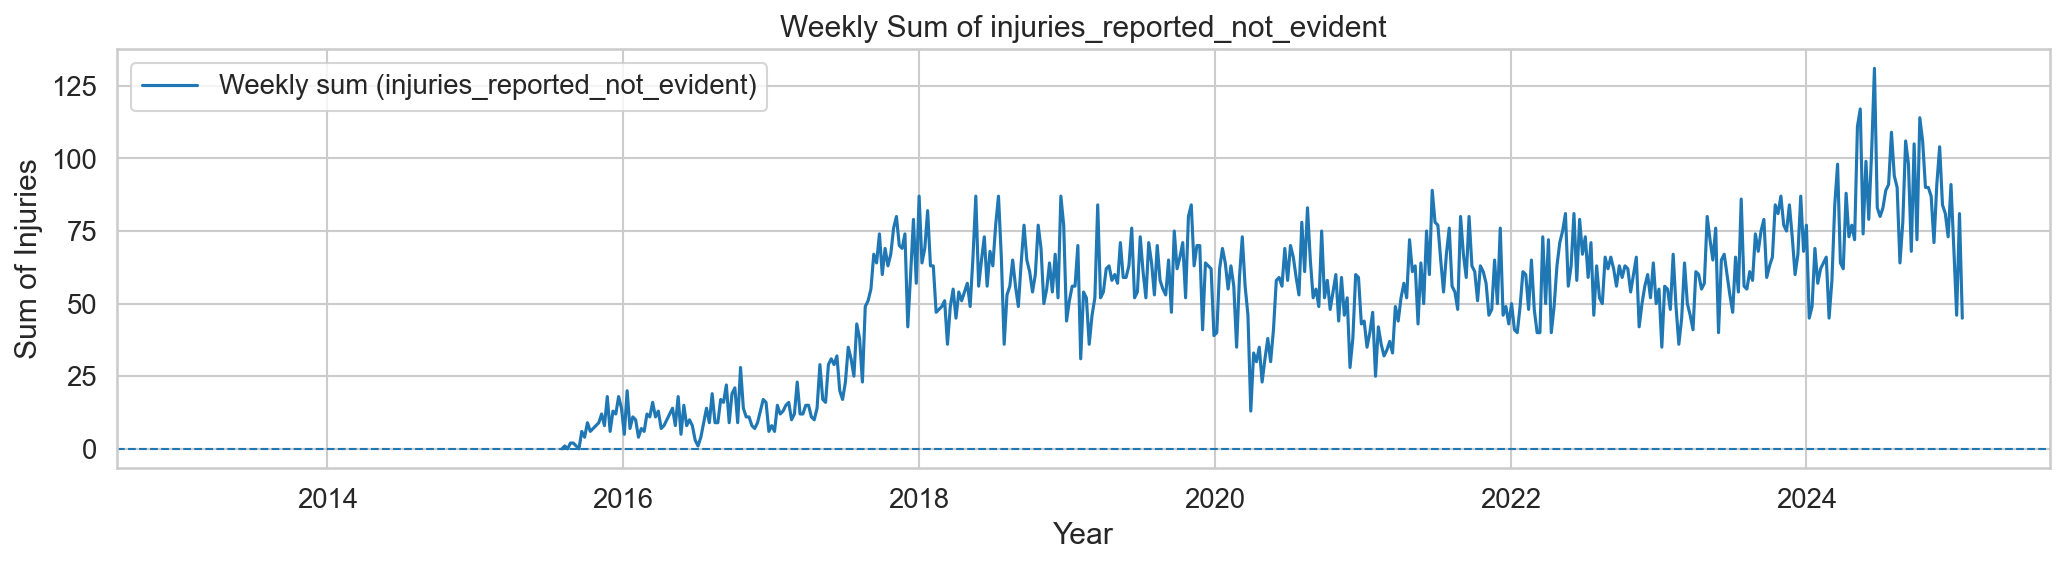

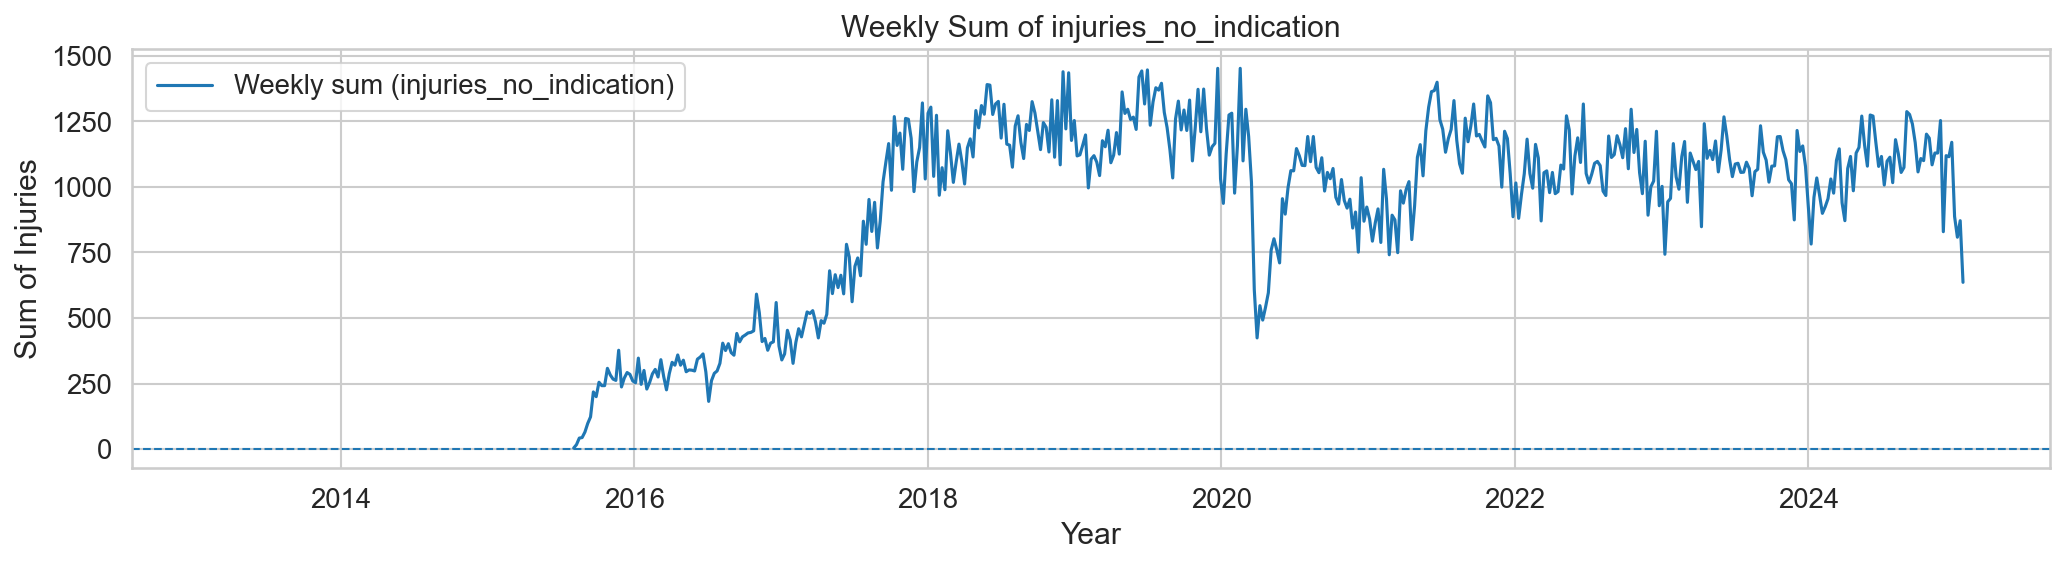

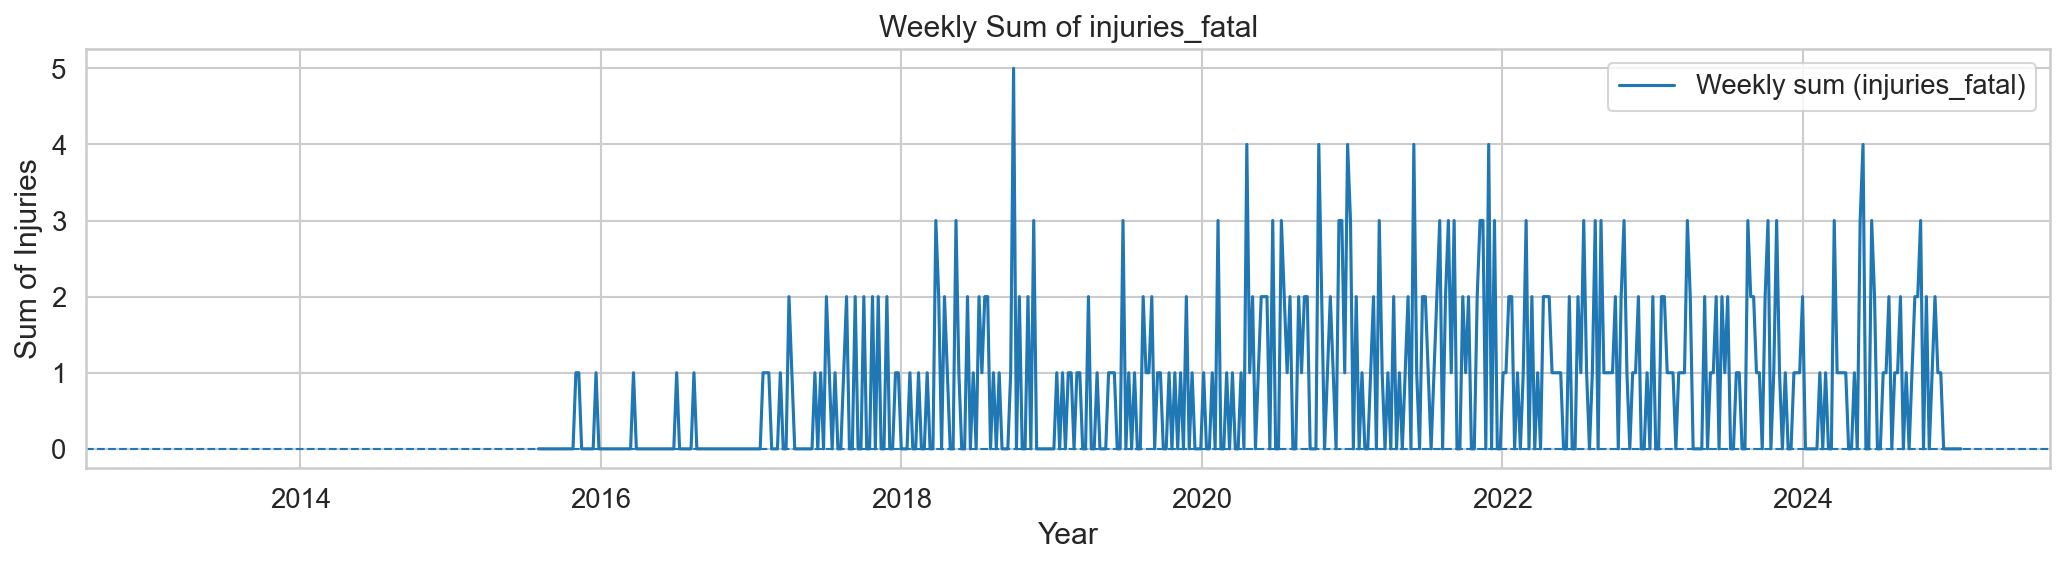

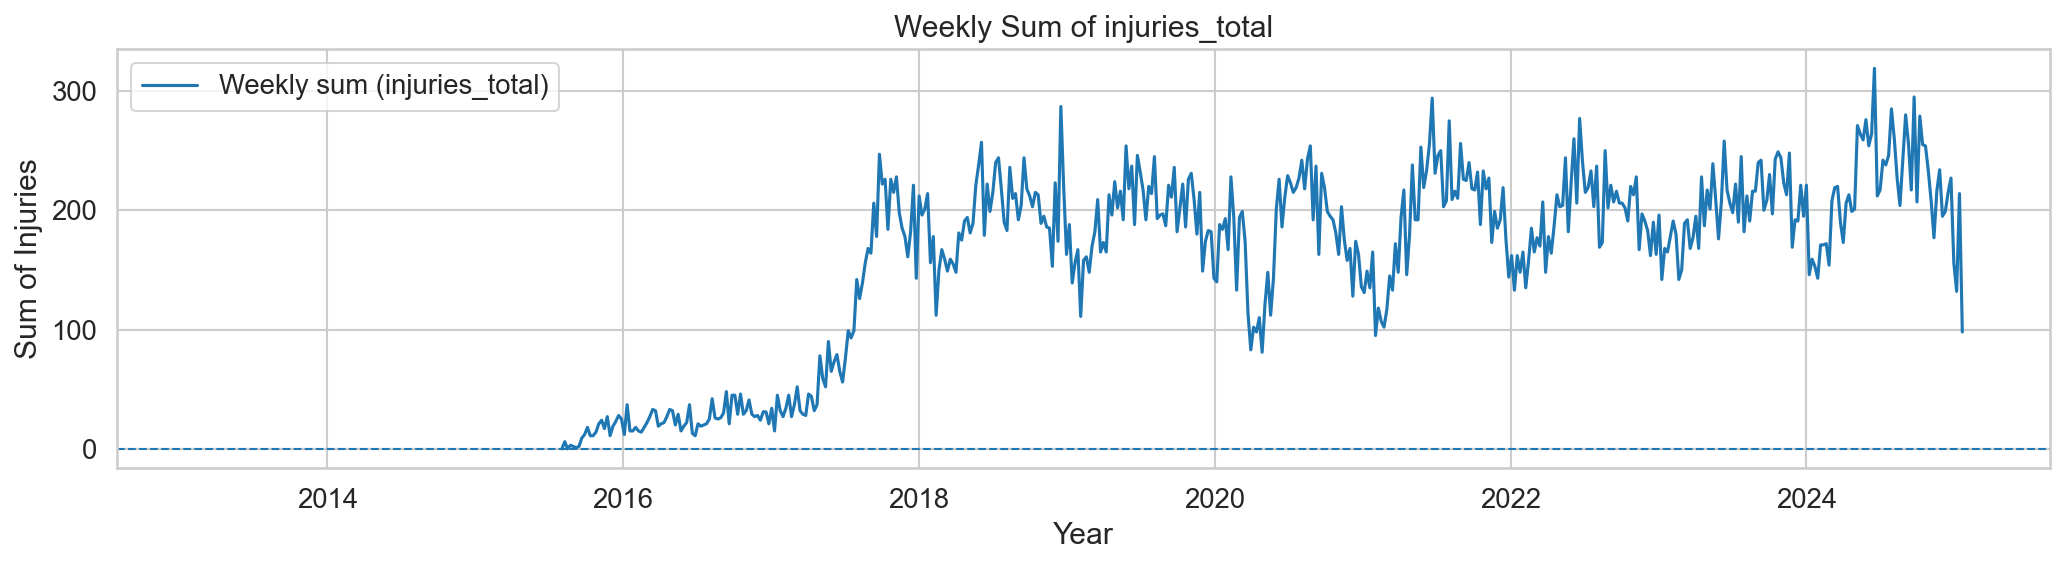

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime
df_plot = df_csv_data.copy()
df_plot["crash_date"] = pd.to_datetime(df_plot["crash_date"])

# Loop through injury columns
for col in col_names:
    if col not in df_plot.columns:
        print(f"Skipping {col}: column not found.")
        continue

    # Resample weekly and sum values
    weekly_sum_col = (
        df_plot.set_index("crash_date")[col]
        .resample("W-MON")
        .sum(min_count=1)  # min_count=1 ensures empty weeks show NaN instead of 0
    )

    # Plot
    plt.figure(figsize=(14, 4))
    plt.plot(weekly_sum_col.index, weekly_sum_col.values, label=f"Weekly sum ({col})")
    plt.axhline(0, linestyle="--", linewidth=1)

    plt.title(f"Weekly Sum of {col}")
    plt.xlabel("Year")
    plt.ylabel("Sum of Injuries")
    plt.legend()
    plt.tight_layout()
    plt.show()


**Cleaning Data**
To clean the data the decision was made to remove all data entries before November of 2017. The reason for that is that there is way more data being sampled after that. The sampling frequency seems inconsistent before and rather consisten after November fo 2017.

In [21]:
# Make a copy and ensure datetime
df_csv_data_cleaned = df_csv_data.copy()
df_csv_data_cleaned["crash_date"] = pd.to_datetime(df_csv_data_cleaned["crash_date"])

# Remove entries before November 2017
df_csv_data_cleaned = df_csv_data_cleaned[df_csv_data_cleaned["crash_date"] >= "2017-11-01"]

C:\Users\Tim\AppData\Local\Temp\ipykernel_2136\4241403268.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_csv_data_cleaned["crash_date"] = pd.to_datetime(df_csv_data_cleaned["crash_date"])


Visualizing removed data.

C:\Users\Tim\AppData\Local\Temp\ipykernel_2136\3734470200.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_plot["crash_date"] = pd.to_datetime(df_plot["crash_date"])


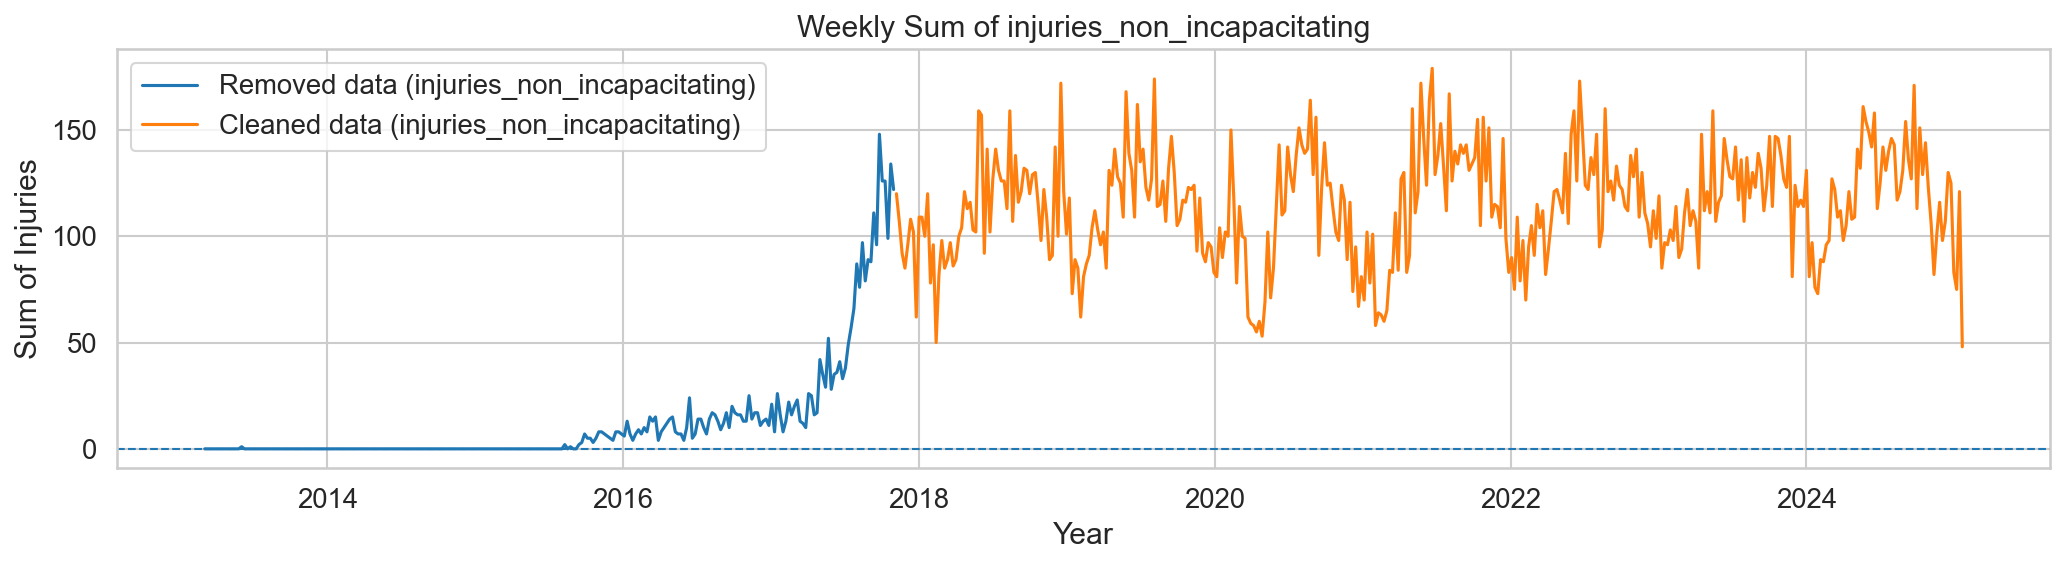

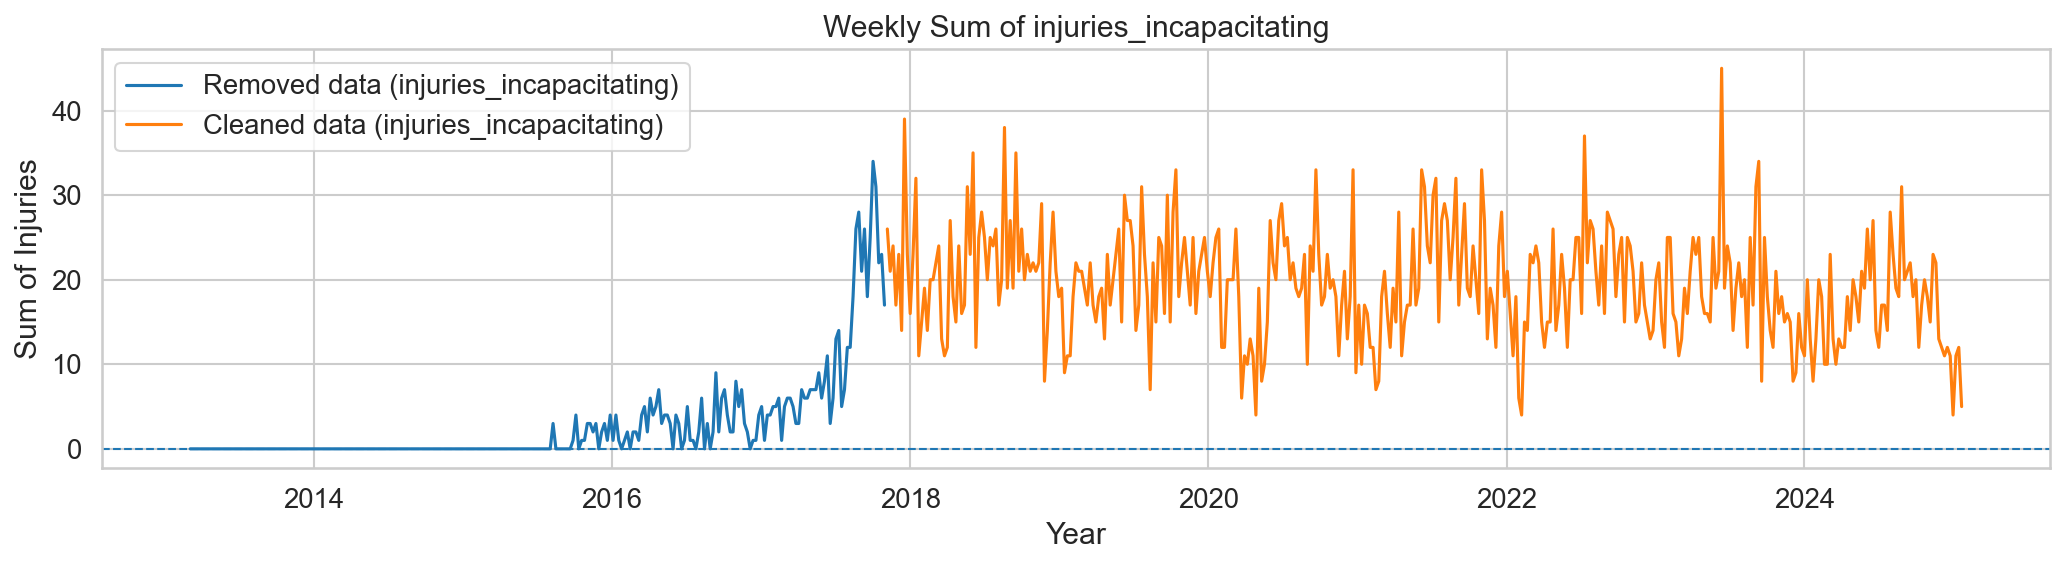

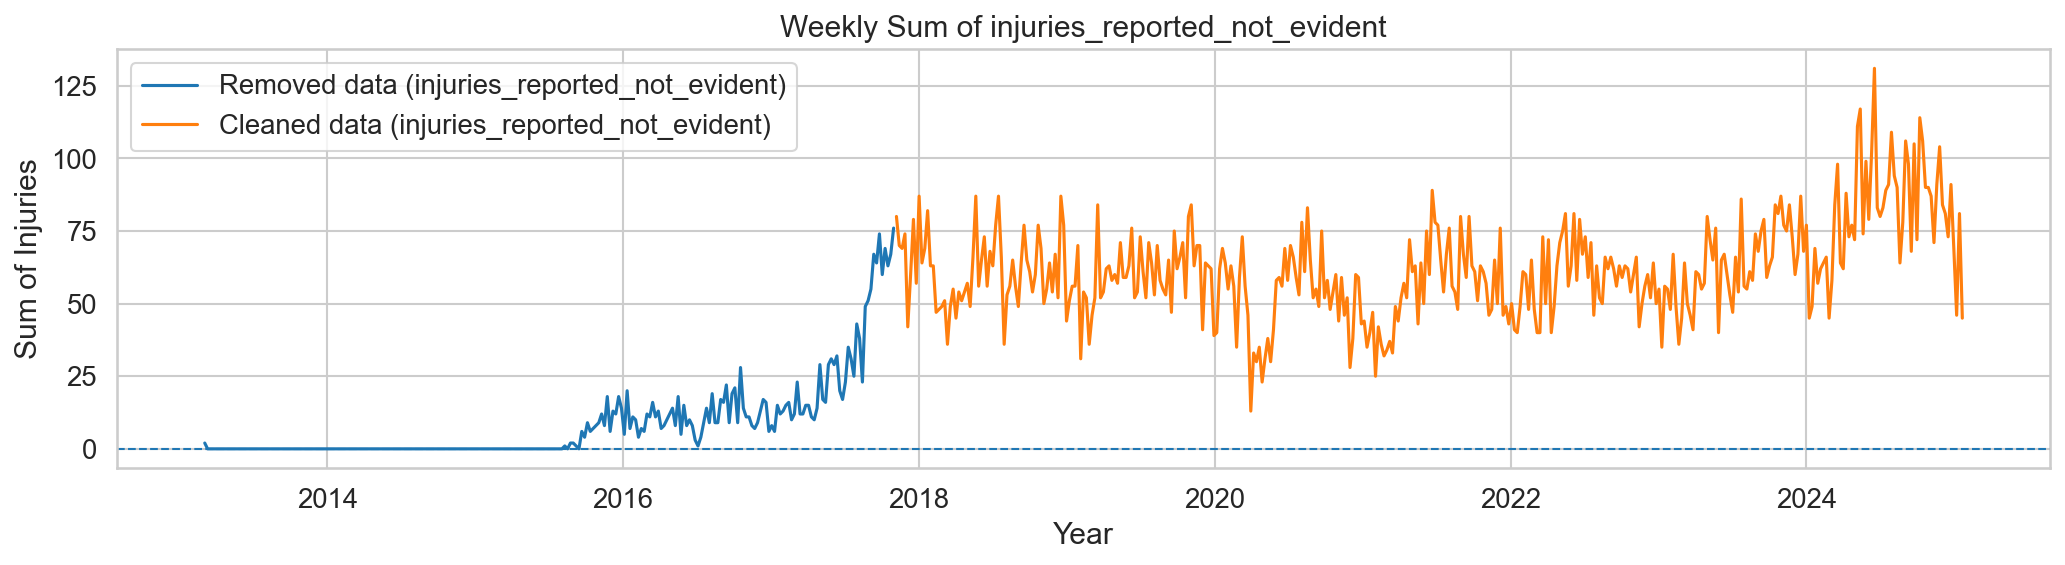

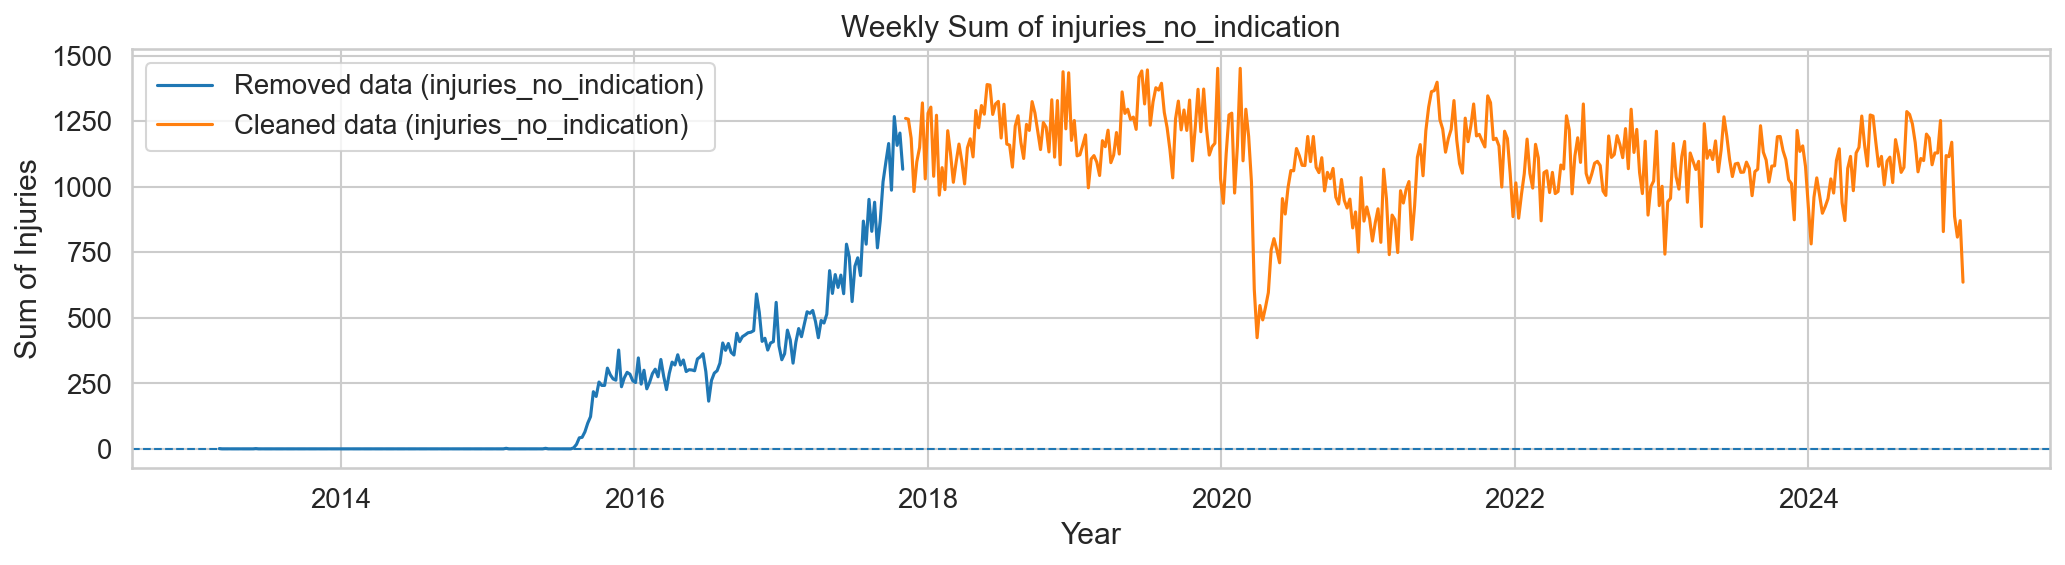

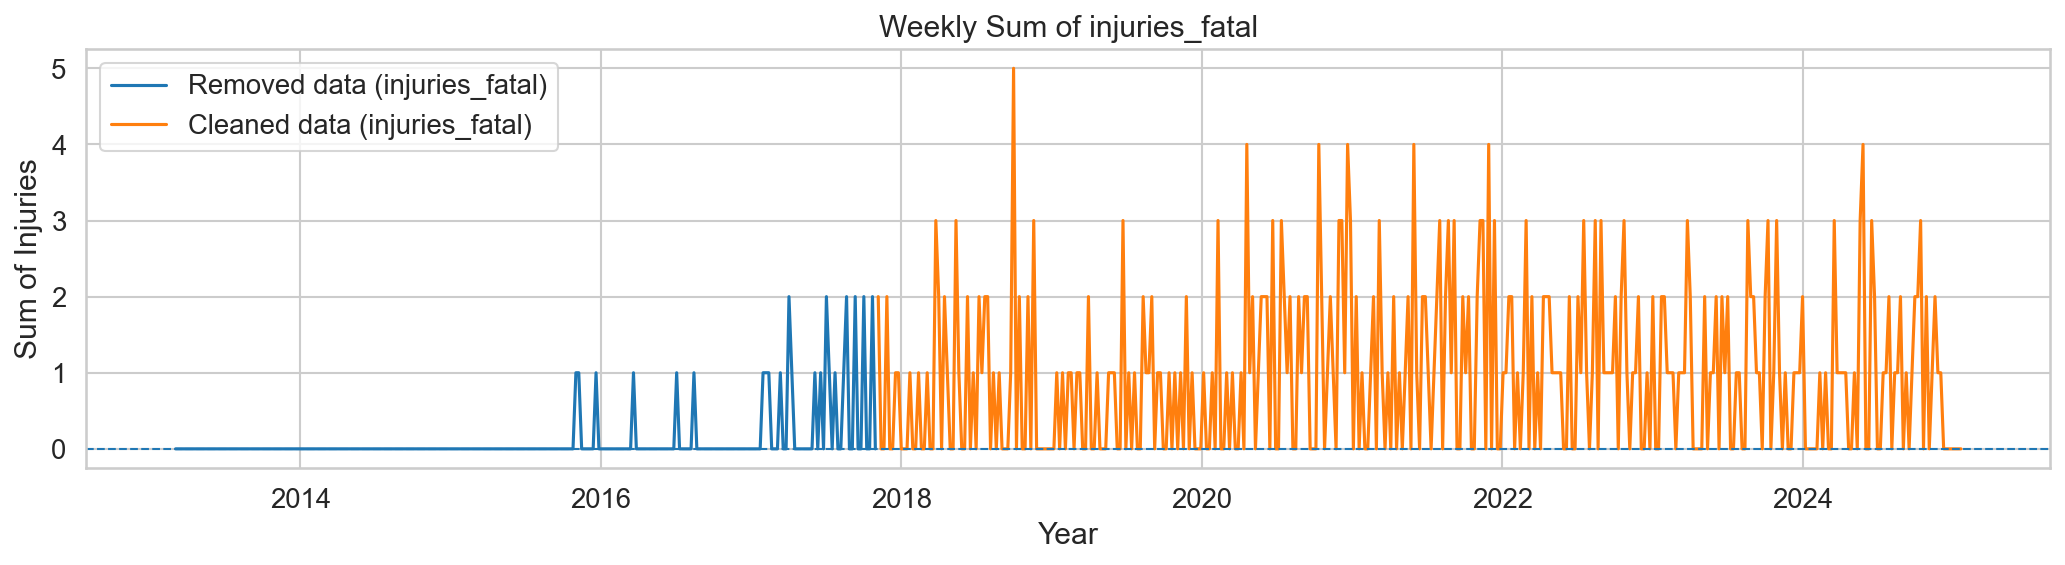

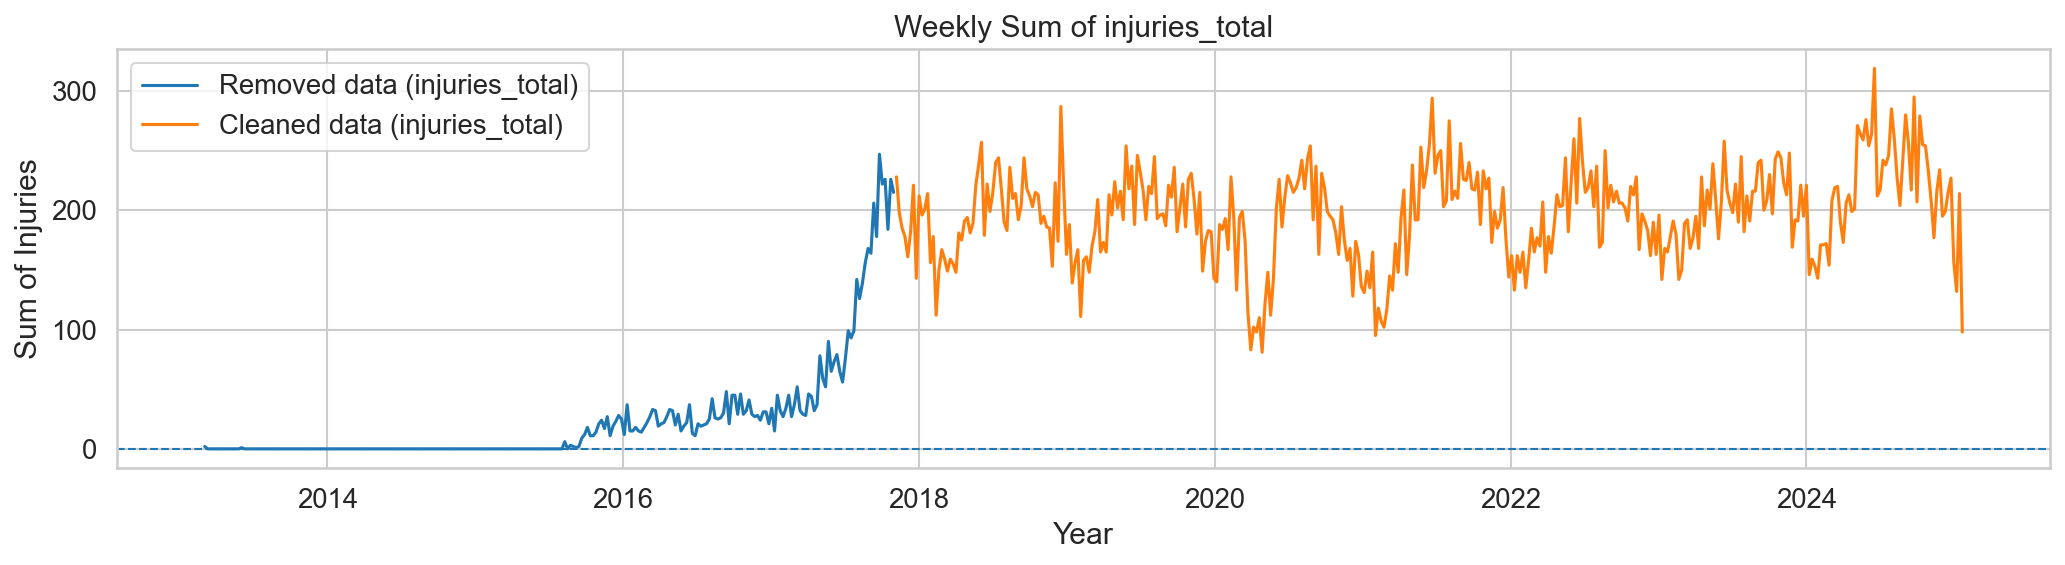

In [22]:
# Ensure datetime
df_plot = df_csv_data.copy()
df_plot["crash_date"] = pd.to_datetime(df_plot["crash_date"])
df_cleaned = df_csv_data_cleaned.copy()
df_cleaned["crash_date"] = pd.to_datetime(df_cleaned["crash_date"])

# Split removed data
df_removed = df_plot[df_plot["crash_date"] < "2017-11-01"]

# Concatenate for consistent weekly resampling
df_combined = pd.concat([df_removed, df_cleaned])

# Loop through injury columns
for col in col_names:
    if col not in df_plot.columns:
        print(f"Skipping {col}: column not found.")
        continue

    # Resample weekly over the full timeline
    weekly_sum = df_combined.set_index("crash_date")[col].resample("W-MON").sum()

    # Separate removed vs cleaned for plotting
    weekly_removed = weekly_sum.loc[weekly_sum.index < "2017-11-01"]
    weekly_cleaned = weekly_sum.loc[weekly_sum.index >= "2017-11-01"]

    # Plot
    plt.figure(figsize=(14, 4))
    plt.plot(weekly_removed.index, weekly_removed.values, label=f"Removed data ({col})")
    plt.plot(weekly_cleaned.index, weekly_cleaned.values, label=f"Cleaned data ({col})")
    plt.axhline(0, linestyle="--", linewidth=1)

    plt.title(f"Weekly Sum of {col}")
    plt.xlabel("Year")
    plt.ylabel("Sum of Injuries")
    plt.legend()
    plt.tight_layout()
    plt.show()


---
## B. Visualization and Exploratory Analysis (55 points)
---
**Assigned to Jeremia**
- Time-series visualizations (raw, smoothed, rolling mean or windowed views) (10 points)
- Distribution analysis with histograms and density style plots where applicable (10 points)
- Correlation analysis and heatmaps (Pearson and at least one alternative such as Spearman,
with short interpretation) (10 points)
- Daily or periodic pattern analysis (day-of-week, hour-of-day, seasonality indicators, or
test-cycle patterns) (15 points)
- Summary of observed patterns as short check statements (similar to True/False style)
with evidence (10 points)

---
## C. Probability and Event Analysis (45 points)
---
**Assigned to Tim**
- Threshold-based probability estimation for events (define event, justify threshold, compute
empirical probability) (15 points)
- Cross tabulation analysis for two variables (10 points)
- Conditional probability analysis (at least two meaningful conditional relationships) (15
points)
- Summary of observations and limitations (what could bias these estimates, what assump-
tions were made) (5 points)

#### Threshold-based probability estimation

In [23]:
# Important Notes:
# purely Data-Driven
# Depends on Size of data, Observation period Data quality

# Event 1: Late hour Crash (between 20:00 and 5:00)
# Relevance: Poor visibility, fatigue, alcohol...
# Thresholds: typical night hours. 
late_hour_event = (
    (df_csv_data_cleaned["crash_hour"] >= 20) |
    (df_csv_data_cleaned["crash_hour"] <= 5)
)

num_late_hour_crashes = late_hour_event.sum()
total_crashes = len(df_csv_data_cleaned)

empirical_probability_late_hour = num_late_hour_crashes / total_crashes
print(f"Empirical Probability Event 1 (Late Hour Crash): {empirical_probability_late_hour:.3%}")

# Event 2: Rush-hour crash (7:00-9:00 and 16:00-18:00)
# Relevance: High traffic density, frequent stop-and-go driving, time pressure and stress
# Thresholds: standard commuting periods
rush_hour_event = (
    ((df_csv_data_cleaned["crash_hour"] >= 7) & (df_csv_data_cleaned["crash_hour"] <= 9)) |
    ((df_csv_data_cleaned["crash_hour"] >= 16) & (df_csv_data_cleaned["crash_hour"] <= 18))
)

num_rush_hour_crashes = rush_hour_event.sum()
total_crashes = len(df_csv_data_cleaned)

empirical_probability_rush_hour = num_rush_hour_crashes / total_crashes
print(f"Empirical Probability Event 2 (Rush Hour Crash): {empirical_probability_rush_hour:.3%}")

# Event 3: Severe crash
# Relevance: fatalities, or life-altering injuries requiring intensive medical care
# Trhesholds: greater than one injury, focus on severity rather than frequency, avoids dilution by
# minor or non-injury crashes
severe_crash_event = (
    (df_csv_data_cleaned["injuries_fatal"] >= 1) |
    (df_csv_data_cleaned["injuries_incapacitating"] >= 1)
)

num_severe_crashes = severe_crash_event.sum()
total_crashes = len(df_csv_data_cleaned)

empirical_probability_severe = num_severe_crashes / total_crashes

print(
    f"Empirical Probability Event 3 (Severe Crash): "
    f"{empirical_probability_severe:.3%}"
)

# Event 4: Non Severe crash
# Relevance: Most of the Accidents are non severe crashes with no major injuries
non_severe_crash_event = (
    (df_csv_data_cleaned["injuries_fatal"] == 0) &
    (df_csv_data_cleaned["injuries_incapacitating"] == 0)
)

num_non_severe_crashes = non_severe_crash_event.sum()
total_crashes = len(df_csv_data_cleaned)

empirical_probability_non_severe = num_non_severe_crashes / total_crashes

print(
    f"Empirical Probability Event 4 (Non-Severe Crash): "
    f"{empirical_probability_non_severe:.3%}"
)

# Since this is the complement of the severe crash event, the added Probability should be 1
print(
    f"Empirical Probability Non-Severe Crash + Severe Crash: "
    f"{empirical_probability_non_severe + empirical_probability_severe:.3%}"
)

# Event 5: Rainy weather crash
# Relevance: Rain and freezing rain: reduce visability, decrease tire-road friction, increase
# braking distances
# Threshold: Freezing rain is grouped with rain, since both involve liquid precipation effecting the
# surface friction
rainy_weather_event = df_csv_data_cleaned["weather_condition"].isin([
    "RAIN",
    "FREEZING RAIN/DRIZZLE"
])

num_rainy_weather_crashes = rainy_weather_event.sum()
total_crashes = len(df_csv_data_cleaned)

empirical_probability_rainy_weather = num_rainy_weather_crashes / total_crashes

print(
    f"Empirical Probability Event 5 (Rainy Weather Crash): "
    f"{empirical_probability_rainy_weather:.3%}"
)

# Event 6: Snowy weather crash
# Relevance: Severly reduced friction, impair vehicle control, may obscure lane markings and ohter
# vehicles
# Threshold: Snow-related categories are grouped due to similar driving hazards
snowy_weather_event = df_csv_data_cleaned["weather_condition"].isin([
    "SNOW",
    "BLOWING SNOW"
])

num_snowy_weather_crashes = snowy_weather_event.sum()
total_crashes = len(df_csv_data_cleaned)

empirical_probability_snowy_weather = num_snowy_weather_crashes / total_crashes

print(
    f"Empirical Probability Event 6 (Snowy Weather Crash): "
    f"{empirical_probability_snowy_weather:.3%}"
)


# Event 7: Poor visibility weather crash
# Relevance: these conditions reduce a driver's ability to: -detect hazards, -judge distance and
# speed, -react in time
# Threshold: Only conditions with direct visibility impairment are included, Categories are chosen
# conservatively to avoid overgeneralization
poor_visibility_event = df_csv_data_cleaned["weather_condition"].isin([
    "FOG/SMOKE/HAZE",
    "SLEET/HAIL",
    "BLOWING SNOW",
    "BLOWING SAND, SOIL, DIRT"
])

num_poor_visibility_crashes = poor_visibility_event.sum()
total_crashes = len(df_csv_data_cleaned)

empirical_probability_poor_visibility = num_poor_visibility_crashes / total_crashes

print(
    f"Empirical Probability Event 7 (Poor Visibility Weather Crash): "
    f"{empirical_probability_poor_visibility:.3%}"
)

# Event 8: Clear
# Relevance: Baseline driving environment, minimal weather-related visual impairment.
# Threshold: Cloudy/overcast conditions usually do not reduce visibility significantly, provides a
# meaningful contrast to poor visibility events
clear_weather_event = df_csv_data_cleaned["weather_condition"].isin([
    "CLEAR",
    "CLOUDY/OVERCAST"
])

num_clear_weather_crashes = clear_weather_event.sum()
total_crashes = len(df_csv_data_cleaned)

empirical_probability_clear_weather = num_clear_weather_crashes / total_crashes

print(
    f"Empirical Probability Event 8 (Clear Weather Crash): "
    f"{empirical_probability_clear_weather:.3%}"
)

Empirical Probability Event 1 (Late Hour Crash): 22.856%
Empirical Probability Event 2 (Rush Hour Crash): 35.926%
Empirical Probability Event 3 (Severe Crash): 3.397%
Empirical Probability Event 4 (Non-Severe Crash): 96.603%
Empirical Probability Non-Severe Crash + Severe Crash: 100.000%
Empirical Probability Event 5 (Rainy Weather Crash): 10.532%
Empirical Probability Event 6 (Snowy Weather Crash): 3.552%
Empirical Probability Event 7 (Poor Visibility Weather Crash): 0.394%
Empirical Probability Event 8 (Clear Weather Crash): 82.141%


#### Cross tabulation analysis

Cross Tabulation: Late-Hour Crash vs Severe Crash
Severe Crash      False  True 
Late Hour Crash               
False            139608   4344
True              40655   1994


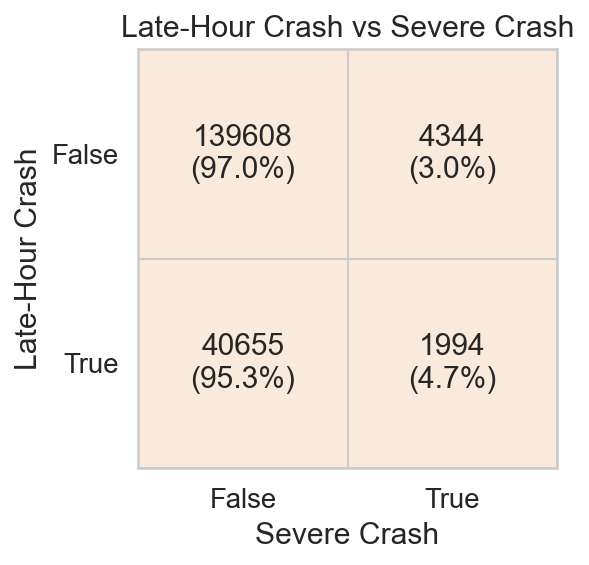


Cross Tabulation: Rush-Hour Crash vs Non-Severe Crash
Non-Severe Crash  False   True 
Rush Hour Crash                
False              4407  115155
True               1931   65108


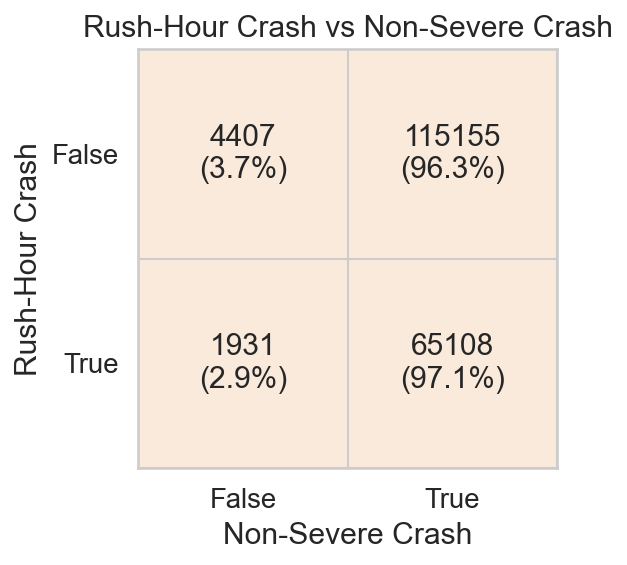


Cross Tabulation: Poor Visibility vs Severe Crash
Severe Crash      False  True 
Poor Visibility               
False            179546   6319
True                717     19


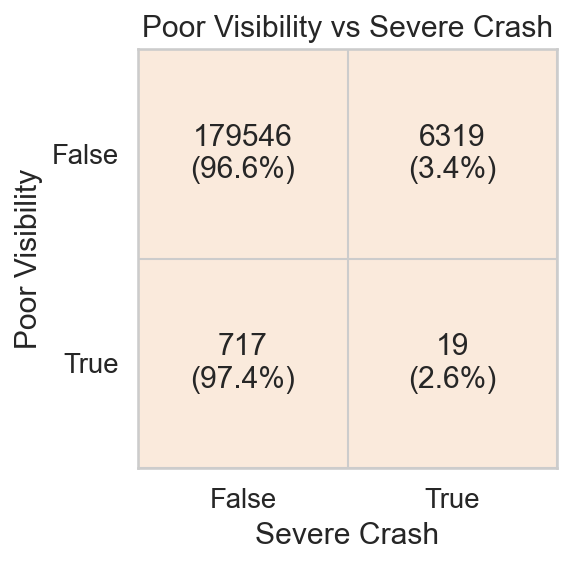

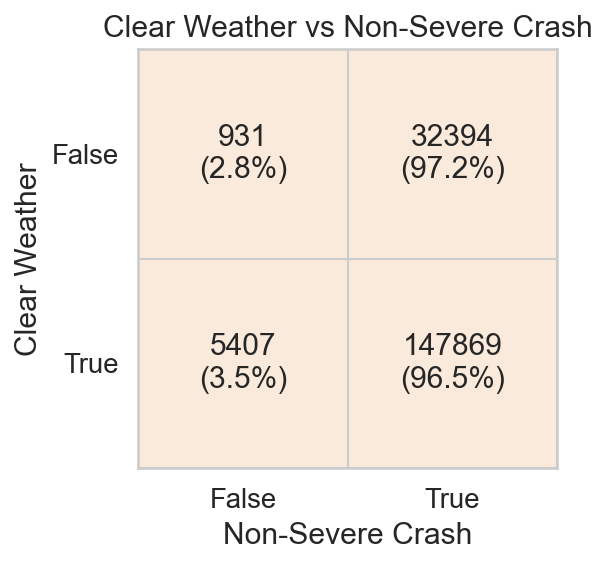


Cross Tabulation: Clear Weather vs Non-Severe Crash
Non-Severe Crash  False   True 
Clear Weather                  
False               931   32394
True               5407  147869


In [ ]:
# Function to display Cross tabulation
def plot_crosstab_table(crosstab, title, xlabel, ylabel):
    # Absolute values
    counts = crosstab.values

    # Row-wise proportions
    proportions = crosstab.div(crosstab.sum(axis=1), axis=0).values

    n_rows, n_cols = counts.shape

    plt.figure()
    plt.imshow(np.ones_like(counts), vmin=0, vmax=1)  # neutral background
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Axis ticks
    plt.xticks(range(n_cols), crosstab.columns.astype(str))
    plt.yticks(range(n_rows), crosstab.index.astype(str))

    # Grid lines
    plt.grid(False)
    plt.gca().set_xticks(np.arange(-.5, n_cols, 1), minor=True)
    plt.gca().set_yticks(np.arange(-.5, n_rows, 1), minor=True)
    plt.grid(which="minor")

    # Cell annotations
    for i in range(n_rows):
        for j in range(n_cols):
            plt.text(
                j, i,
                f"{counts[i, j]}\n({proportions[i, j]*100:.1f}%)",
                ha="center",
                va="center"
            )

    plt.tight_layout()
    plt.show()

# Cross Tabulation 1: Late-Hour Crash vs Severe Crash
# Relevance: Night driving is associated with: -fatigue, -reduced visibility, -alcohol.
# What we analyze: Are severe crashes over-represented during late hours?
crosstab_late_severe = pd.crosstab(
    late_hour_event,
    severe_crash_event,
    rownames=["Late Hour Crash"],
    colnames=["Severe Crash"]
)

print("Cross Tabulation: Late-Hour Crash vs Severe Crash")
print(crosstab_late_severe)
plot_crosstab_table(
    crosstab_late_severe,
    title="Late-Hour Crash vs Severe Crash",
    xlabel="Severe Crash",
    ylabel="Late-Hour Crash"
)

# Cross Tabulation 2: Rush-Hour Crash vs Non-Severe Crash
# Relevance: Rush hours involve: -high traffic density, -lower speeds, -frequent stop and go
# situations
# Hypothesis: more crashes, but often less severe
# What we analyze: What is the proportion of non-severe crashes higher during rush hours?
crosstab_rush_non_severe = pd.crosstab(
    rush_hour_event,
    non_severe_crash_event,
    rownames=["Rush Hour Crash"],
    colnames=["Non-Severe Crash"]
)

print("\nCross Tabulation: Rush-Hour Crash vs Non-Severe Crash")
print(crosstab_rush_non_severe)
plot_crosstab_table(
    crosstab_rush_non_severe,
    title="Rush-Hour Crash vs Non-Severe Crash",
    xlabel="Non-Severe Crash",
    ylabel="Rush-Hour Crash"
)

# Cross Tabulation 3: Poor Visibility vs Severe Crash
# Relevance: Visability directly affects reaction time. Well established relationship in traffic
# safty research
# What we analyze: Do severe crashes occur more frequently under poor visibility conditions?
crosstab_visibility_severe = pd.crosstab(
    poor_visibility_event,
    severe_crash_event,
    rownames=["Poor Visibility"],
    colnames=["Severe Crash"]
)

print("\nCross Tabulation: Poor Visibility vs Severe Crash")
print(crosstab_visibility_severe)
plot_crosstab_table(
    crosstab_visibility_severe,
    title="Poor Visibility vs Severe Crash",
    xlabel="Severe Crash",
    ylabel="Poor Visibility"
)

# Cross Tabulation 4: Clear Weather vs Non-Severe Crash
# Relevance: Clear conditions serve as a baseline
# What we analyze: Are crashes under clear weather more likely to be non-severe?
crosstab_clear_non_severe = pd.crosstab(
    clear_weather_event,
    non_severe_crash_event,
    rownames=["Clear Weather"],
    colnames=["Non-Severe Crash"]
)
print("\nCross Tabulation: Clear Weather vs Non-Severe Crash")
print(crosstab_clear_non_severe)
plot_crosstab_table(
    crosstab_clear_non_severe,
    title="Clear Weather vs Non-Severe Crash",
    xlabel="Non-Severe Crash",
    ylabel="Clear Weather"
)

#### Conditional Probability

In [27]:
# Conditional Probability 1:
# Probability of a severe crash given a late-hour crash
# Relevance: Late hours are associated with fatigue, alcohol, and reduced visibility,
# which may increase crash severity.

severe_given_late_hour = (
    severe_crash_event & late_hour_event
).sum() / late_hour_event.sum()

print(
    f"Conditional Probability P(Severe Crash | Late-Hour Crash): "
    f"{severe_given_late_hour:.3%}"
)

# Conditional Probability 2:
# Probability of a severe crash given poor visibility conditions
# Relevance: Poor visibility impairs hazard perception and reaction time,
# potentially leading to higher-impact collisions.

severe_given_poor_visibility = (
    severe_crash_event & poor_visibility_event
).sum() / poor_visibility_event.sum()

print(
    f"Conditional Probability P(Severe Crash | Poor Visibility): "
    f"{severe_given_poor_visibility:.3%}"
)


# Conditional Probability 3:
# Probability of a non-severe crash given a rush-hour crash
# Relevance: Rush-hour traffic typically involves lower speeds due to congestion,
# which may reduce injury severity despite higher crash frequency.

non_severe_given_rush_hour = (
    non_severe_crash_event & rush_hour_event
).sum() / rush_hour_event.sum()

print(
    f"Conditional Probability P(Non-Severe Crash | Rush-Hour Crash): "
    f"{non_severe_given_rush_hour:.3%}"
)


Conditional Probability P(Severe Crash | Late-Hour Crash): 4.675%
Conditional Probability P(Severe Crash | Poor Visibility): 2.582%
Conditional Probability P(Non-Severe Crash | Rush-Hour Crash): 97.120%


#### Summary of Observations
Observations:
- Contrary to intuitive expectations, the conditional probabilities of severe crashes under
  late-hour conditions and poor visibility conditions are relatively low and of similar magnitude.
  (P(Severe Crash∣Late Hour)≈4.7%, 𝑃(Severe Crash∣Poor Visibility)≈2.6%, P(Severe Crash∣Rush
  Hour)≈2.29%)
- Conditions that increase the likelihood of crashes do not necessarily increase the severity of outcomes.

Assumptions:
- All crashes are treated as independent observations, even though multiple crashes may involve
similar locations, times, or drivers.
- Binary event definitions (e.g., severe vs non-severe) adequately capture the complexity of crash outcomes.
- Weather and lighting conditions recorded at the time of the crash correctly represent the actual
  driving conditions experienced by drivers.
- The chosen thresholds (e.g., late hours, rush hours, severity definitions) meaningfully separate
  different risk regimes.

Potential Bias and Limitations:
- Fatal and incapacitating injury crashes are relatively rare.
- This can lead to unstable probability estimates and large relative changes from small absolute
  differences.
- Injury severity may be misclassified or updated after initial reporting.
- Weather and visibility conditions are categorical and may not capture intensity (e.g., light vs
  heavy rain).
- Time-based thresholds (late hours, rush hours) are somewhat arbitrary and based on common
  conventions.
- Slight changes to these thresholds could alter probability estimates.
- Variables such as speed, driver age, alcohol involvement, and road type are not controlled for.
- Traffic volume is not directly observed, limiting interpretation of frequency-based probabilities.


---
## D. Statistical Theory Applications (45 points)
---
**Assigned to Tim**
- Law of Large Numbers demonstration (15 points)
- Central Limit Theorem application (sampling distributions, effect of sample size, interpretation) (25 points)
- Result interpretation and sanity checks (what would invalidate your conclusion, what you verified) (5 points)

---
## E. Regression and Predictive Modeling (45 points)
---
**Assigned to Lorenz**
- Define a prediction target and features (justify why they make sense) (10 points)
- Linear or polynomial model selection (include rationale and show at least two candidates)
(10 points)
- Model fitting and validation (train-test split appropriate for time-series. e.g., time-based split) (15 points)
- Residual analysis and interpretation (errors, bias, failure cases, what to improve next) (10 points)

---
## F. Dimensionality Reduction and Statistical Tests (40 points)
---
**Assigned to Jeremia**
### Part 1. Dimensionality Reduction (25 points)
- PCA projection and interpretation (variance explained, what clusters or separations mean) (10 points)
- t-SNE embedding with justified hyperparameters (perplexity or similar) and interpretation (7 points)
- UMAP embedding with justified hyperparameters (neighbors, min dist or similar) and interpretation (8 points)
### Part 2. Hypothesis Tests (15 points)
Perform at least three tests. Each test must include: null hypothesis, why the test is appropriate, assumptions, p-value, and practical interpretation.
- Chi-square test (choose one):
    - Chi-square test of independence (use a contingency table from two categorical or binned variables), or
    - Chi-square goodness-of-fit (compare observed counts to an expected distribution you justify). (5 points)
- One mean or location comparison test (choose one): t-test, Welch t-test, Mann-Whitney U, or ANOVA (5 points)
- One time-series relevant test (choose one): stationarity test (ADF or KPSS), Ljung-Box for autocorrelation, or change-point style test if justified (5 points)